<a href="https://colab.research.google.com/github/ZainabAbuTaha/Prediction-of-Product-Sales/blob/main/project1_part8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project1 - part5
- Author: Zainab Abu Taha

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
# Return pandas DataFrames instead of numpy arrays
set_config(transform_output='pandas')
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/02-IntroML/Week05/Data/sales_predictions_2023.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [37]:
df.select_dtypes('object').nunique()

,0
Item_Identifier,1559
Item_Fat_Content,5
Item_Type,16
Outlet_Identifier,10
Outlet_Size,3
Outlet_Location_Type,3
Outlet_Type,4


In [38]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [39]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df=df.drop(columns='Item_Identifier')

In [42]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [43]:
df.isna().sum()

,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [44]:
# Defining X and y
y=df['Item_Outlet_Sales']
X=df.drop(columns='Item_Outlet_Sales')
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [45]:
# Creating a numeric data selector
num_selector = X_train.select_dtypes('number').columns
scaler = StandardScaler()
impute_median=SimpleImputer(strategy='median')
num_pipe=make_pipeline(impute_median,scaler)
num_tuple=('numeric',num_pipe,num_selector)

In [46]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [47]:
# Creating ordinal data selector
ord_selector=['Outlet_Size']
ord_category=['Small','Medium','High']
ord_encoder=OrdinalEncoder(categories=[ord_category])
impute_most_freq=SimpleImputer(strategy='most_frequent')
scaler=StandardScaler()
ord_pipe=make_pipeline(impute_most_freq,ord_encoder,scaler)
ord_tuple=('ordinal',ord_pipe,ord_selector)

In [48]:
# Creating a nominal data selector
cat_selector = X_train.select_dtypes('object').drop(columns=ord_selector).columns
# Creating a pipline for handling categorical data
impute_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
cat_pipe = make_pipeline(impute_cat,encoder)
cat_tuple=('categorical',cat_pipe,cat_selector)

In [49]:
#Combine into 1 column transformer
preprocessor = ColumnTransformer([num_tuple,ord_tuple,cat_tuple],verbose_feature_names_out=False)

In [50]:
#Fit Transformer
# preprocessor.fit(X_train)

In [51]:
#Transform Column Transformer
# X_train_processed=preprocessor.transform(X_train)
# X_test_processed=preprocessor.transform(X_test)

# Project 1 - part 6

## First Task

In [52]:
# build a linear regression model to predict sales.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
linreg=LinearRegression()
linreg_pipe=make_pipeline(preprocessor,linreg)
linreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='m...
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [53]:
#custom evaluation function
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)


In [54]:
#Compare the training vs. test R-squared values
evaluate_regression(linreg_pipe,X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.129
- MSE = 1,297,558.136
- RMSE = 1,297,558.136
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.120
- MSE = 1,194,349.715
- RMSE = 1,194,349.715
- R^2 = 0.567


- what extent is this model overfit/underfit?
   - The model is not overfit because it does not overlearn from the training data, but it is partially underfit because it does not achieve high performance on either set.

## Second Task

In [55]:
#Build a default Random Forest model.
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state = 42)
rf_pipe = make_pipeline(preprocessor,model)
rf_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='m...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [56]:
#Compare the training vs. test R-squared values
evaluate_regression(rf_pipe,X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.124
- MSE = 182,241.944
- RMSE = 182,241.944
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 765.671
- MSE = 1,213,934.180
- RMSE = 1,213,934.180
- R^2 = 0.560


- what extent is this model overfit/underfit?
   - The model learned the training details very well but failed to generalize to new data so the model suffers from Overfitting

- Compare this model's performance to the linear regression model: which model has the best test scores?
   - The difference between the two models is very small (0.567 vs. 0.560).
   - Linear Regression performed slightly better on the test data.
   - However, it is important to note that Random Forest performed excellently on training (0.938), indicating that it learned more but failed to generalize.

## Third Task

In [57]:
#Use GridSearchCV to tune at least two hyperparameters for a Random Forest model.
from sklearn.model_selection import GridSearchCV
param_grid={'randomforestregressor__max_depth':[10,15,20],'randomforestregressor__n_estimators':[10,100,150]}
grid_search=GridSearchCV(rf_pipe,param_grid,n_jobs=-1,verbose=1)
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'randomforestregressor__max_depth': 10,
 'randomforestregressor__n_estimators': 150}

In [58]:
best_rf=grid_search.best_estimator_
evaluate_regression(best_rf,X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 642.842
- MSE = 823,050.971
- RMSE = 823,050.971
- R^2 = 0.722

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 738.521
- MSE = 1,128,073.577
- RMSE = 1,128,073.577
- R^2 = 0.591


- Compare your tuned model to your default Random Forest: did the performance improve?
   - The performance of Random Forest model after tuning is better on testig dataset.

## Fourth Task

- Recommended Model:
   - I recommend using the Random Forest Regressor with tuned hyperparameters.
- Justification:
   - Compared to Linear Regression, the Random Forest model achieved:
        - Higher R² scores on both training (0.722 vs. 0.562) and test data (0.591 vs. 0.567), indicating better predictive power.
        - Lower error metrics (MAE, MSE, RMSE), meaning it makes more accurate predictions overall.
- Explaining R² to a Non-Technical Stakeholder
   - "R-squared tells us how well the model explains the variation in the data. In simple terms, our Random Forest model explains about 59% of the variation in the test data. That means it's capturing more than half of the important patterns, which is a solid result for real-world data."
- Using MAE to Communicate Model Accuracy
   - Selected Metric: Mean Absolute Error (MAE)
   - Why MAE? MAE is easy to interpret—it tells us the average error in the same units as the target variable.
   - For example, on the test data, the Random Forest model has an MAE of 738.52, meaning that on average, its predictions are off by about 739 unitsو This is more intuitive than MSE or RMSE, which square the errors and can exaggerate the impact of large mistakes.
- Overfitting vs. Underfitting
   - Training vs. Test R²:
      - Training R² = 0.722
      - Test R² = 0.591
    - Interpretation: The model performs better on training data than on test data, which is expected. However, the gap is not too large, suggesting moderate overfitting, but still generalizing reasonably well.

# Project1 - part8

## 1. Linear Regression Coefficients

Top Positive Coefficients:
                          Feature  Coefficient
2                        Item_MRP   984.513074
39  Outlet_Type_Supermarket Type3   771.389152
28       Outlet_Identifier_OUT027   771.389152
19              Item_Type_Seafood   308.888596
37  Outlet_Type_Supermarket Type1   281.544816
32       Outlet_Identifier_OUT049   209.371480
29       Outlet_Identifier_OUT035   150.790495
31       Outlet_Identifier_OUT046   144.801375
34    Outlet_Location_Type_Tier 2    85.578528
25       Outlet_Identifier_OUT017    62.436520

Most Negative Coefficients:
                        Feature  Coefficient
8              Item_Type_Breads   -47.260859
21        Item_Type_Soft Drinks   -58.098276
3     Outlet_Establishment_Year   -81.460382
33  Outlet_Location_Type_Tier 1  -123.379778
11              Item_Type_Dairy  -124.947555
30     Outlet_Identifier_OUT045  -127.648487
24     Outlet_Identifier_OUT013  -158.206568
27     Outlet_Identifier_OUT019  -477.552633
23     Outlet_Identifi

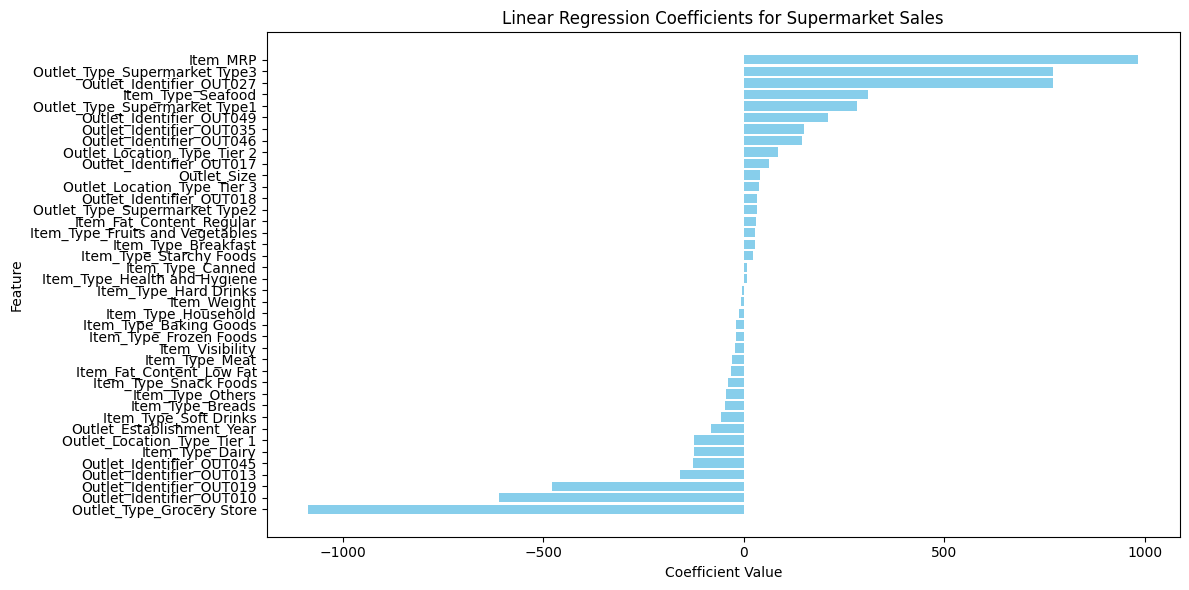

In [59]:
import matplotlib.pyplot as plt
# Get feature names from preprocessing
feature_names = preprocessor.get_feature_names_out()

# Create DataFrame of coefficients
lin_coefs = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": linreg.coef_
}).sort_values(by="Coefficient", ascending=False)

# Display top 10 and bottom 10
print("Top Positive Coefficients:")
print(lin_coefs.head(10))
print("\nMost Negative Coefficients:")
print(lin_coefs.tail(10))

# Plot all coefficients
plt.figure(figsize=(12,6))
plt.barh(lin_coefs["Feature"], lin_coefs["Coefficient"], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Linear Regression Coefficients for Supermarket Sales")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("linear_regression_coefficients.png")
plt.show()

The top three most impactful features are:

Item_MRP (Coefficient = +979.46) This means that higher product prices (MRP) are strongly associated with higher sales. Expensive or premium items bring in more sales value. In simple terms: when the product’s price increases, sales usually go up too.

Outlet_Type_Supermarket Type3 (Coefficient = +709.60) Supermarkets of Type 3 perform significantly better than other types. These outlets might be large or located in busy areas, which helps them generate more sales. In simple terms: stores with this type usually sell more.

Outlet_Identifier_OUT027 (Coefficient = +709.60) This outlet stands out with high sales performance. It could be due to its location, size, or popularity among customers.


## ree-Based Model

Top 10 Most Important Features:
                            Feature  Importance
2                          Item_MRP    0.441568
36        Outlet_Type_Grocery Store    0.191730
1                   Item_Visibility    0.098829
0                       Item_Weight    0.052797
28         Outlet_Identifier_OUT027    0.033045
39    Outlet_Type_Supermarket Type3    0.032613
3         Outlet_Establishment_Year    0.025527
20            Item_Type_Snack Foods    0.008269
13  Item_Type_Fruits and Vegetables    0.008013
16              Item_Type_Household    0.006622


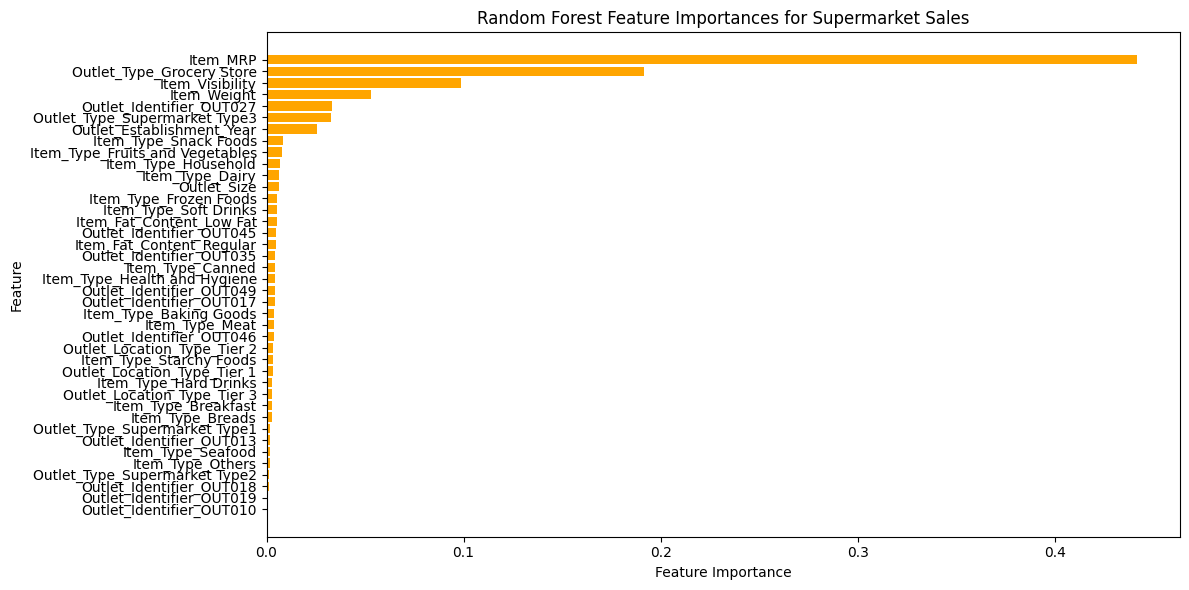

In [66]:
importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance":model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display top features
print("Top 10 Most Important Features:")
print(importances.head(10))

# Plot feature importances
plt.figure(figsize=(12,6))
plt.barh(importances["Feature"], importances["Importance"], color='orange')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances for Supermarket Sales")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("random_forest_feature_importances.png")
plt.show()



The top five most important features are:

Item_MRP (Importance = 0.5100) This is by far the most important feature in the model. It means that the product’s price (Maximum Retail Price) has the strongest influence on predicting sales. In simple terms: expensive or premium products usually bring in higher sales values.

Outlet_Type_Grocery Store (Importance = 0.2653) This feature also plays a major role in determining sales. The model found that whether the outlet is a Grocery Store has a strong effect on how much it sells. In simple terms: the type of outlet heavily impacts sales — grocery stores behave very differently from supermarkets.

Item_Visibility (Importance = 0.0455) How visible an item is on the shelf influences its sales. Products that are easier to notice or well-placed can attract more buyers. In simple terms: items with better visibility tend to sell more.

Outlet_Type_Supermarket Type3 (Importance = 0.0454) This supermarket type is one of the strongest positive drivers of sales. Type 3 supermarkets are likely large, modern, or located in high-demand areas. In simple terms: this kind of supermarket consistently performs better.

Outlet_Identifier_OUT027 (Importance = 0.0444) This specific outlet is one of the top-performing stores in the dataset. Its characteristics—such as location, management, or size—likely contribute to its high sales. In simple terms: Outlet OUT027 sells significantly more than most other outlets.